# Machine Learning Project - Wine Quality Prediction
## Yinuo Song

## Wine Quality
Wine is an alcoholic drink typically made from fermented grapes. The earliest known traces of wine are from Georgia (c. 6000 BC), Iran (Persia) (c. 5000 BC), and Sicily (c. 4000 BC) although there is evidence of a similar alcoholic drink being consumed earlier in China (c. 7000 BC). Wine reached the Balkans by 4500 BC and was consumed and celebrated in ancient Greece, Thrace and Rome. Throughout history, wine has been consumed for its intoxicating effects.

Wine quality refers to the factors that go into producing a wine, as well as the indicators or characteristics that tell you if the wine is of high quality.

When you know what influences and signifies wine quality, you’ll be in a better position to make good purchases. You’ll also begin to recognize your preferences and how your favorite wines can change with each harvest. Your appreciation for wines will deepen once you’re familiar with wine quality levels and how wines vary in taste from region to region.

## About the dataset
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

## Load the data

In [2]:
# Import Pandas
import pandas as pd

# Import Numpy
import numpy as np

# Import sklearn
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Import Tensorflow
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

# Import scipy
from scipy import stats as st

# Import warnings
import warnings 
warnings.filterwarnings('ignore')

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)

# Import Seaborn
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
### Load wine quality data into Pandas
df_red = pd.read_csv("winequality-red.csv")
df_white = pd.read_csv("winequality-white.csv")

In [4]:
df_red["color"] = "R"
df_white["color"] = "W"
df_all=pd.concat([df_red,df_white],axis=0)

In [5]:
df_white.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid',
'volatile acidity':'volatile_acidity','residual sugar':'residual_sugar',
'free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [6]:
df_red.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid',
'volatile acidity':'volatile_acidity','residual sugar':'residual_sugar',
'free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [7]:
df_all.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid',
'volatile acidity':'volatile_acidity','residual sugar':'residual_sugar',
'free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [8]:
df_all.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [9]:
df = pd.get_dummies(df_all, columns=["color"])

In [10]:
df_red.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
df_white.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [12]:
print("white mean = ",df_white["quality"].mean())
print("red mean =",df_red["quality"].mean())

white mean =  5.87790935075541
red mean = 5.6360225140712945


In [13]:
d = {'color': ['red','white'], 'mean_quality': [5.636023,5.877909]}
df_mean = pd.DataFrame(data=d)
df_mean

,color,mean_quality
0,red,5.636023
1,white,5.877909


Thus we have seen dimensions of the data, both the dataset has same number of variables. Each wine sample (row) has the following characteristics (columns):

- Fixed acidity
- Volatile acidity
- Citric acid
- Residual sugar
- Chlorides
- Free sulfur dioxide
- Total sulfur dioxide
- Density
- pH
- Sulphates
- Alcohol
- Quality (score between 0 and 10)

## Data Processing

Now that we have loaded the dateset, we will need to process it before we can do any analysis. Oftentimes, data can be quite messy, especially if it hasn’t been well-maintained. You’ll see errors that will corrupt your analysis: values set to null though they really are zero, duplicate values, and missing values. This whole process is called Data Processing. Data processing is, generally, the collection and manipulation of items of data to produce meaningful information. In this sense it can be considered a subset of information processing, the change (processing) of information in any manner detectable by an observer.

## Missing Values
Missing values are always a problem while analysing the data and also buliding the models using that data. Missing values might affect the model and analysis to greater extent by resulting in errors in the code and sometimes wrong insights about the data. Thus we will look for missing values in both the data.

In [14]:
# Compute the percentage of missing value in the data
def missing_percentage(data1, data2, col_name = "Missing value (%)"):
    # Calculating the missing percentage
    missing_df1 = pd.DataFrame(data1.isnull().sum() /len(data1)*100, columns = [col_name])
    missing_df2 = pd.DataFrame(data2.isnull().sum() /len(data2)*100, columns = [col_name])
    # Forming the output dataframe
    missing_df = pd.DataFrame({'Red Wine': missing_df1.iloc[:, 0], 'White wine': missing_df2.iloc[:, 0]})
    return missing_df

missing_percentage(df_red, df_white)

,Red Wine,White wine
fixed_acidity,0.0,0.0
volatile_acidity,0.0,0.0
citric_acid,0.0,0.0
residual_sugar,0.0,0.0
chlorides,0.0,0.0
free_sulfur_dioxide,0.0,0.0
total_sulfur_dioxide,0.0,0.0
density,0.0,0.0
pH,0.0,0.0
sulphates,0.0,0.0


Above table clearly shows that we have the data intact 100% and there is no missing data in the our dataset.

## Exploratory Data Analysis
After we have checked our data for the missing values, let shift our focus in understanding the data in much better way. We will be using visualization in order to do Exploratory Data Analysis(EDA). EDA is an approach for data analysis that employs a variety of techniques mostly graphical to

- Uncover underlying structure
- Extract important variables
- Detect outliers and anomalies
- Develop parsimonious models
- Determine optimal factor settings

## Correlation
In order to find out how much does the quality depends on the different variable content, we will try to address the all the relation between the the variables in our dataset using correlation and heatmaps.

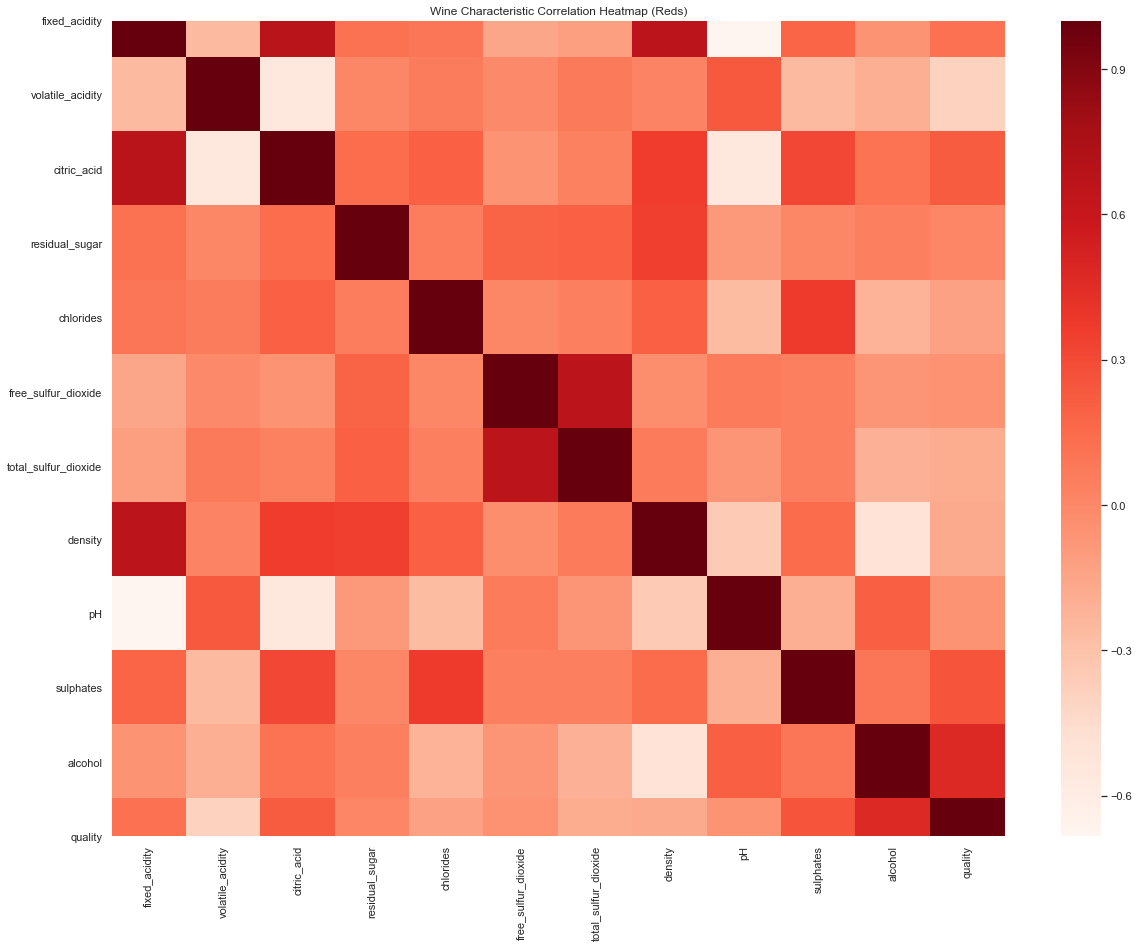

In [15]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Wine Characteristic Correlation Heatmap (Reds)")
corr = df_red.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Reds")
plt.show()

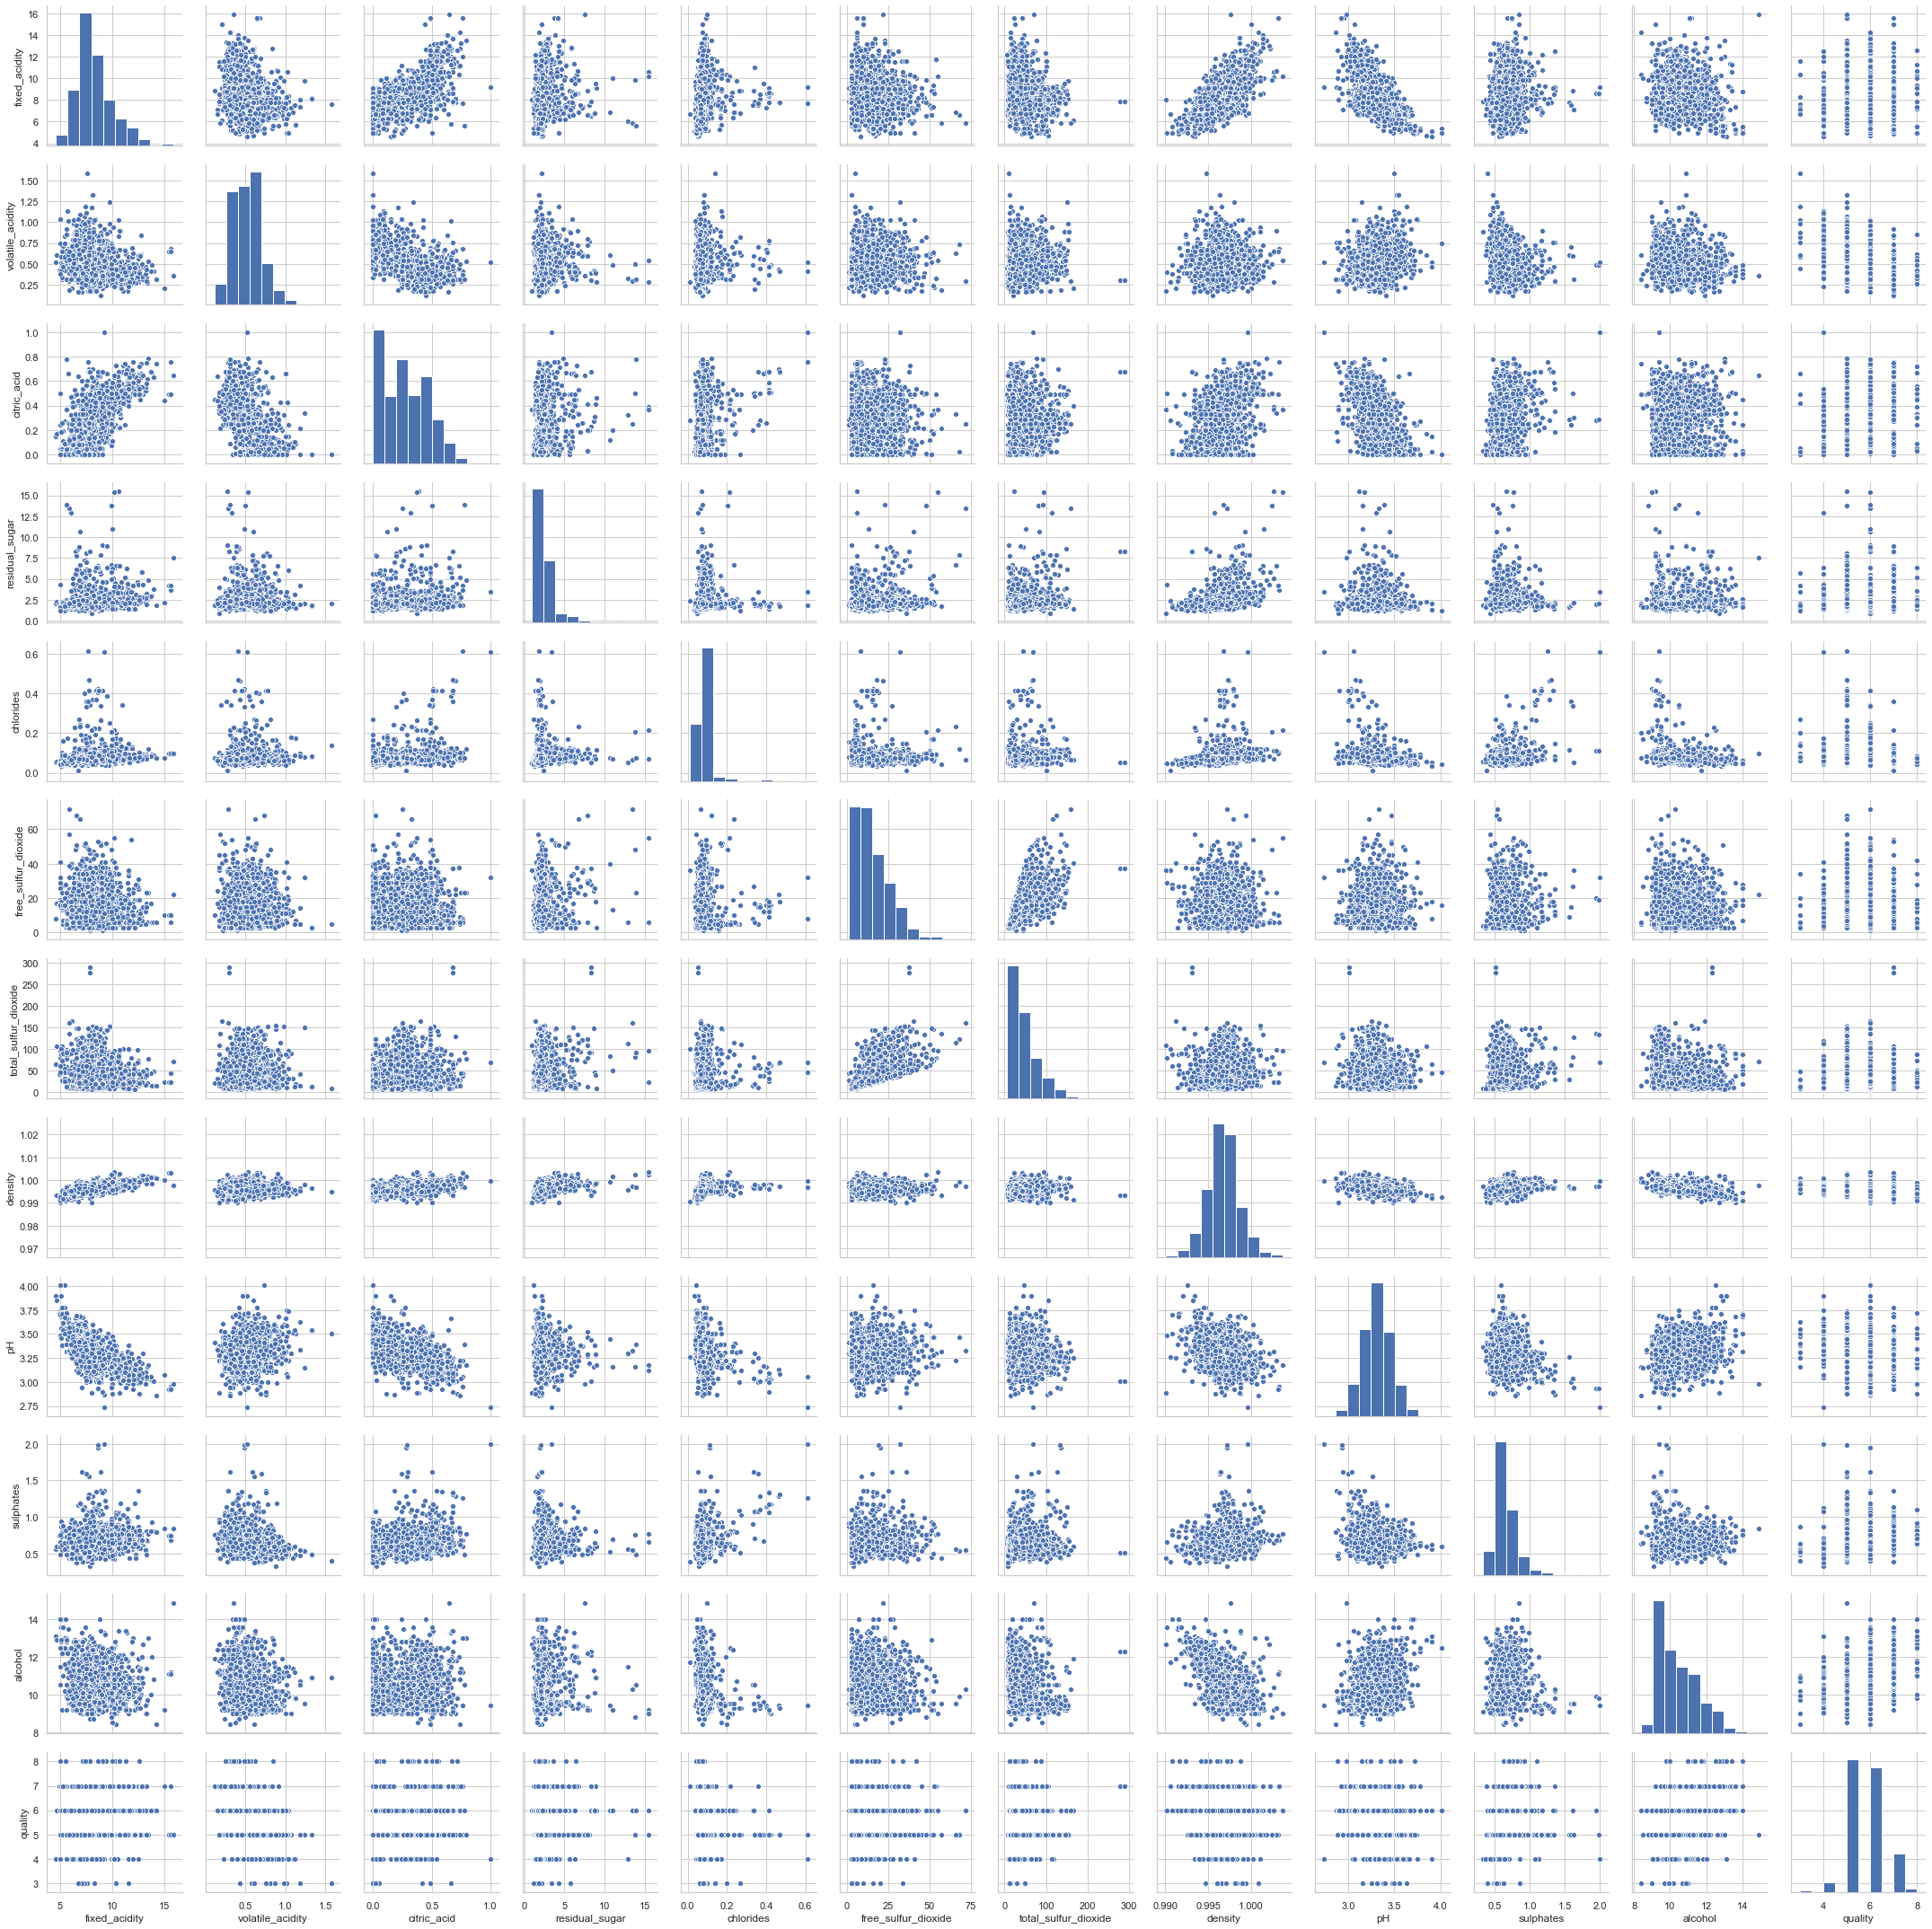

In [16]:
sns.pairplot(df_red)

Heatmap of red wine dataset shows the correlation between the variables in its dataset. High concentration of color representation high corrlation. Dark red represents positive and light color represents negative correlation. And the correlation plot shows the relationship between the different variables of a dataset.

From the above heatmap and correlation plot on the red wine, we have the following inference:

- It looks like we have pH and fixed acidity has inverse relationships between them. The same in case of citric acid and volatile acidity too.
- There is a strong positive relationship between total sulfur dioxide and free sulfur dioxide.

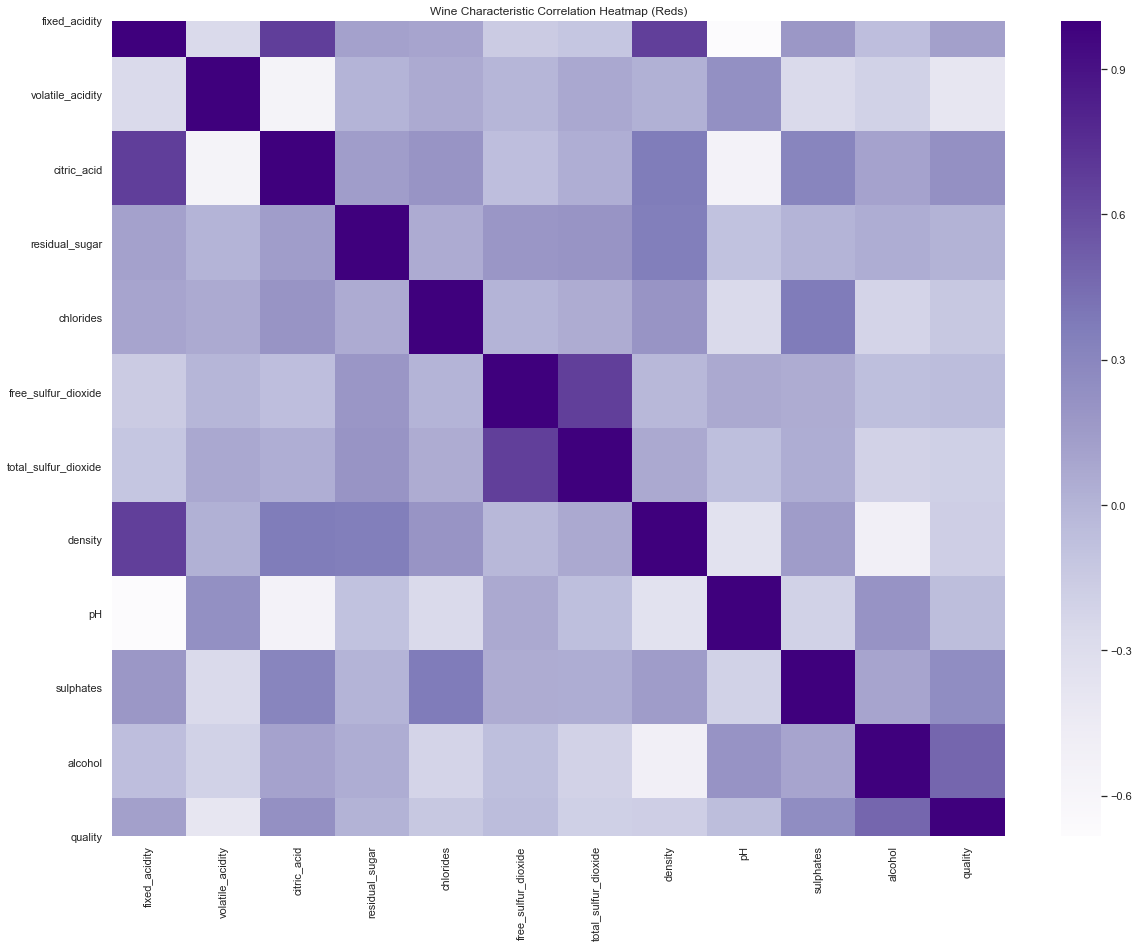

In [17]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Wine Characteristic Correlation Heatmap (Reds)")
corr = df_red.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Purples")

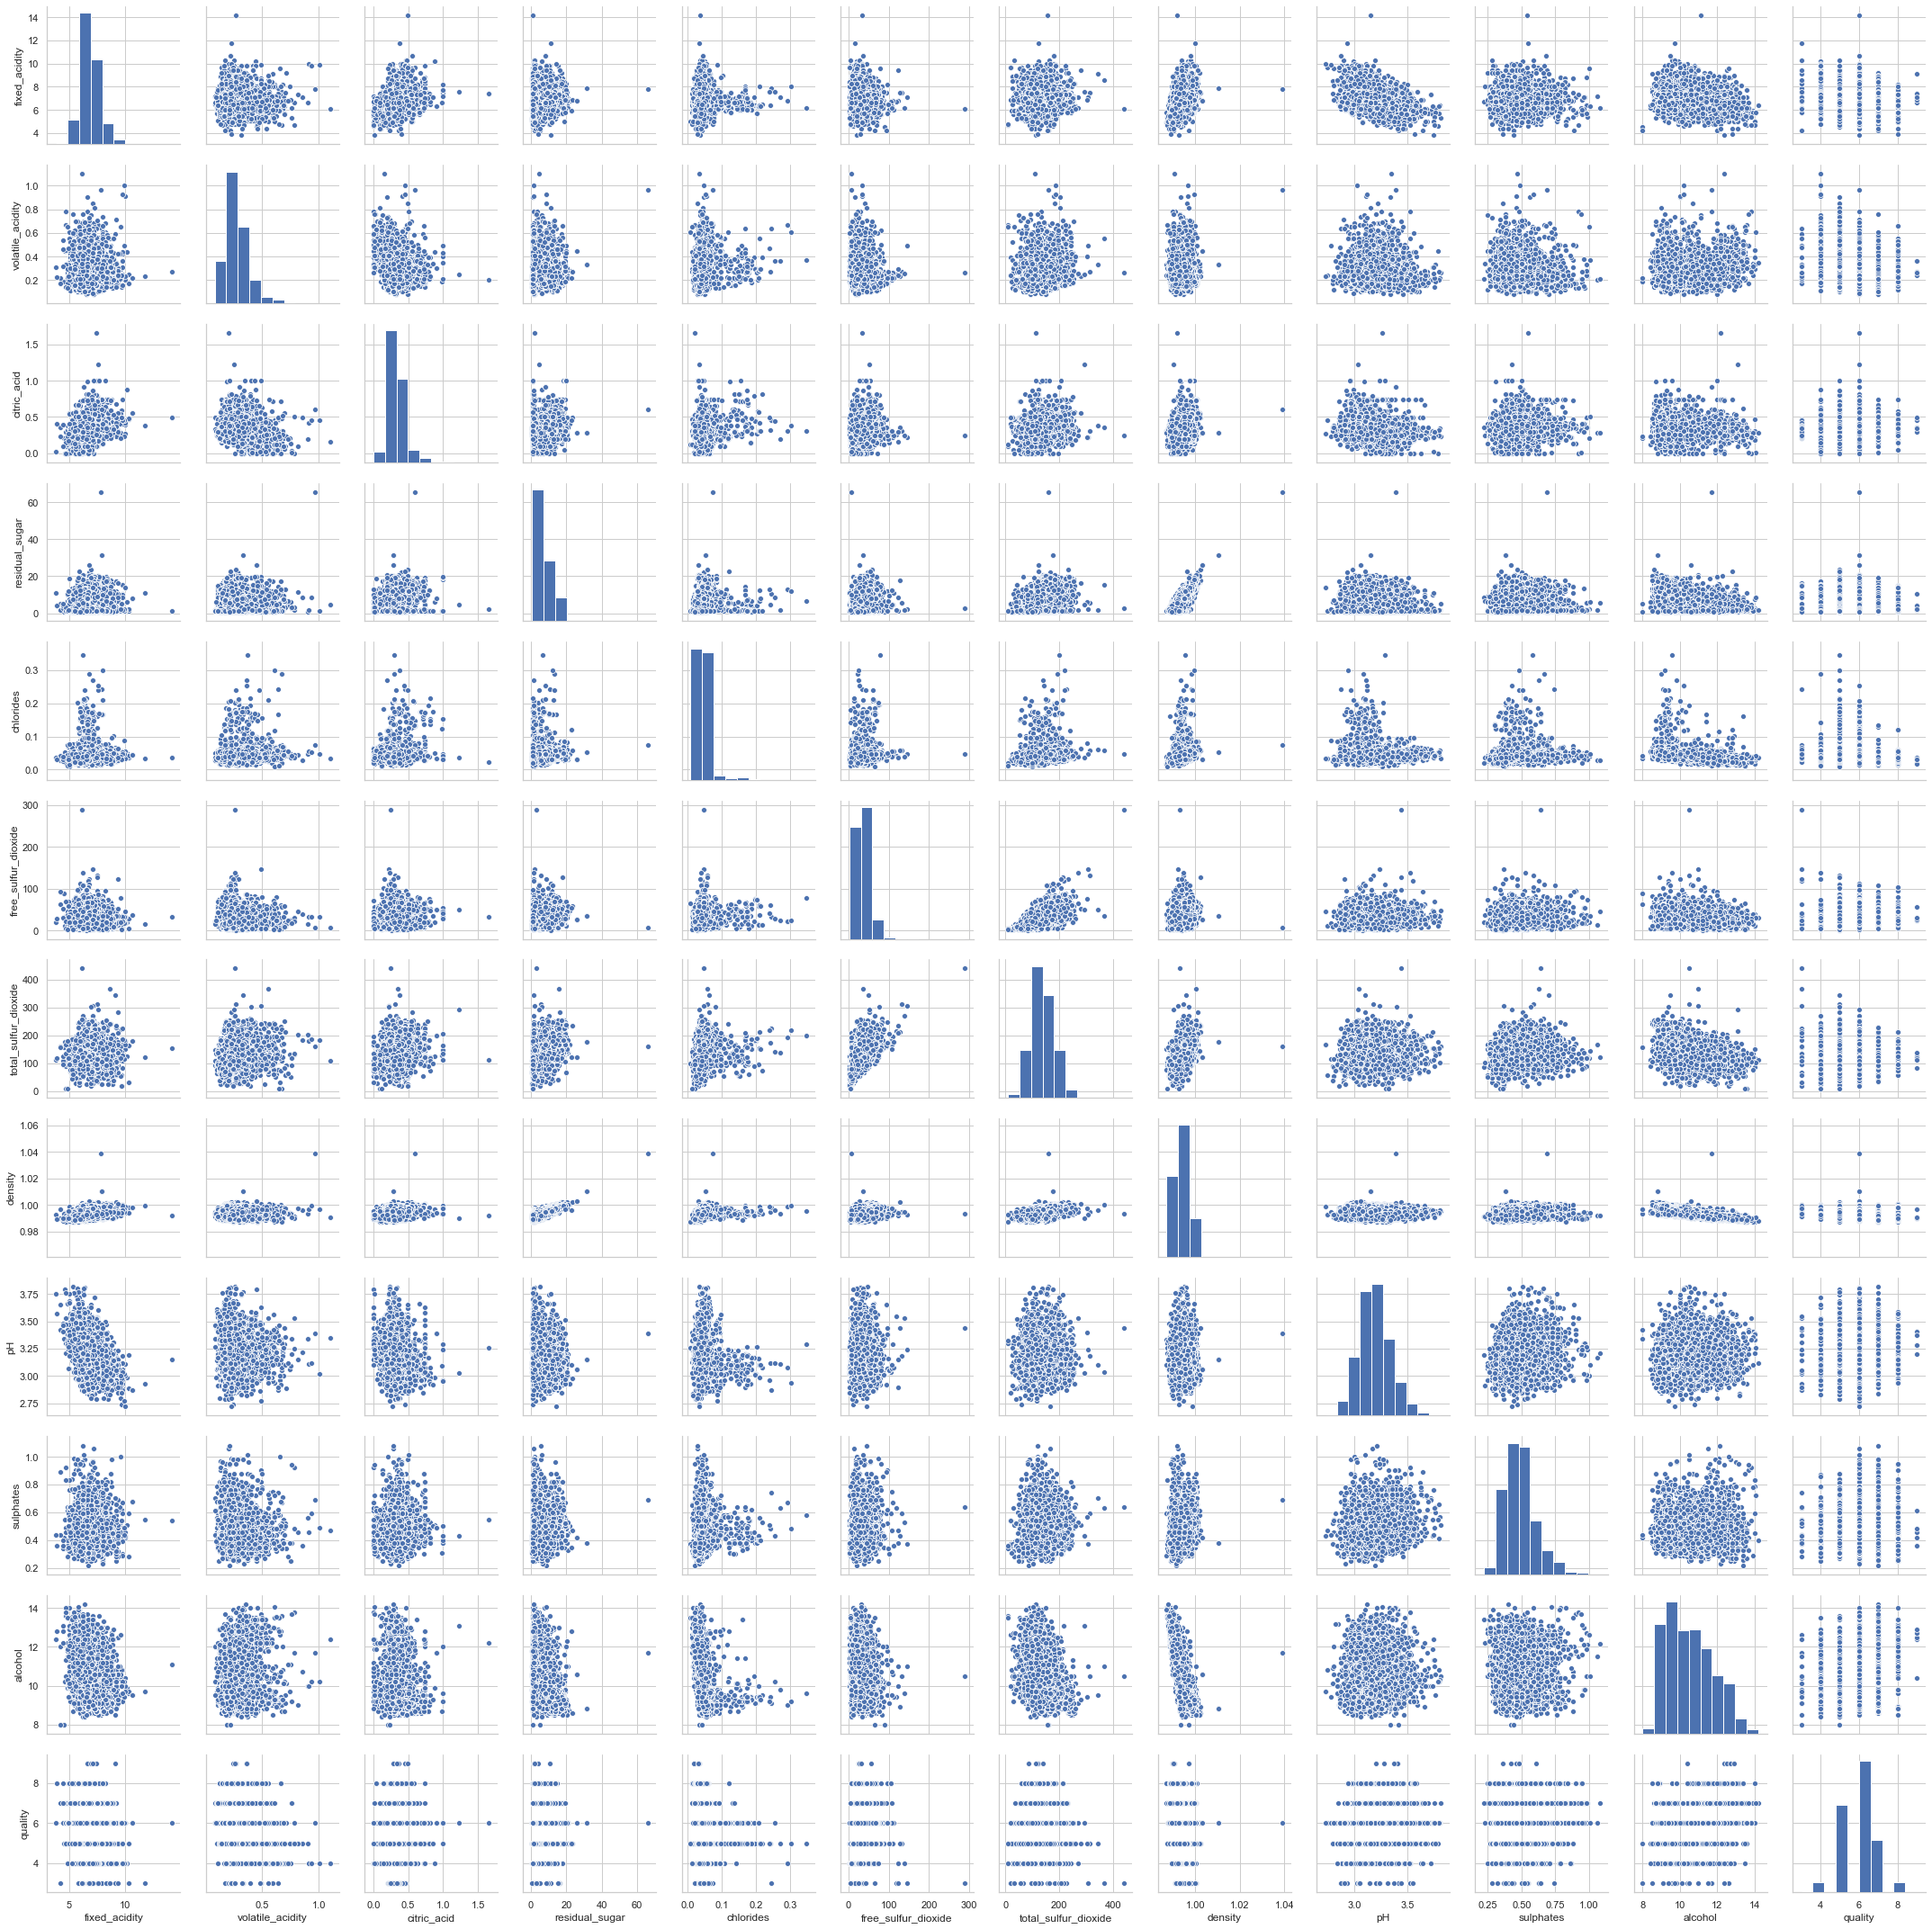

In [115]:
sns.pairplot(df_white)

Heatmap of white wine dataset shows the correlation between the variables in its dataset. High concentration of color representation high corrlation. Dark purple represents positive and light color represents negative correlation. And the correlation plot shows the relationship between the different variables of a dataset.

From the above heatmap and correlation plot on the white wine, we have the following inference:

- We see that low density contents are high on alcohol content
- Sugar content in the wine might represents the wine density
- Just like red wine, here also total and free sulfur dioxide are related together

In [18]:
df_red = df_red.drop(columns=['citric_acid','density','free_sulfur_dioxide'])
df_white = df_white.drop(columns=['citric_acid','density','free_sulfur_dioxide'])

In order to avoid the multicolinearity, we decide to drop the three varibales to build model with higher accuracy:

- citric_acid
- density
- free_sulfur_dioxide

## Outliers
In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

Therefore, before we build regression models and use machine learning method to make the predictions about the wine quality, we should detect whether there are outliers in the datasets and remove them from the datasets.

In [19]:
outliers = []  # list to store outliers value

# method for detecting the outliers using interquantilerange technique 
def detect_outliers(data): 
    quantile1, quantile3 = np.percentile(data, [25, 75])  # create two quantiles for 25% and 75%
    iqr_val = quantile3 - quantile1                       # interquantilerange value
    lower_bound_value = quantile1 - (1.5 * iqr_val)       # lower limit of the data, anything greater are not outliers
    upper_bound_value = quantile3 + (1.5 * iqr_val)       # upper limit of the data, anything less are not outliers
    
    for i in data:
        if lower_bound_value < i < upper_bound_value:     # if data[value] is greater than lbv and less than ubv than it is not considered as an outlier
            pass
        else:
            outliers.append(i)
            
    return lower_bound_value, upper_bound_value           # return lower bound and upper bound value for the data

In [20]:
# Custom boxplot
def box_plot(data, height = 10, width = 16, title = "Boxplot"):
    # Make the figure object
    plt.figure(figsize=(width, height))
    # Add title
    plt.suptitle(title, y = 0.94, fontsize = 30)
    # Scale the font size
    sns.set(font_scale = 2)
    # Create the boxplot
    sns.boxplot(data = data, orient = "h")

In [21]:
df_red.describe()

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,total_sulfur_dioxide,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,2.538806,0.087467,46.467792,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,1.409928,0.047065,32.895324,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.900000,0.012000,6.000000,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,1.900000,0.070000,22.000000,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,2.200000,0.079000,38.000000,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,2.600000,0.090000,62.000000,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,15.500000,0.611000,289.000000,4.010000,2.000000,14.900000,8.000000


In [22]:
detect_outliers(df_red["fixed_acidity"])

(3.95, 12.349999999999998)

In [23]:
df_red = df_red.drop(df_red[df_red["fixed_acidity"]>12.349999999999998].index)

In [24]:
detect_outliers(df_red["volatile_acidity"])

(0.027500000000000024, 1.0075)

In [25]:
detect_outliers(df_red["residual_sugar"])

(0.8499999999999996, 3.6500000000000004)

In [26]:
df_red = df_red.drop(df_red[df_red["residual_sugar"]>3.6500000000000004].index)

In [27]:
detect_outliers(df_red["chlorides"])

(0.0415, 0.11750000000000002)

In [28]:
df_red = df_red.drop(df_red[df_red["chlorides"]>0.11750000000000002].index)

In [29]:
detect_outliers(df_red["total_sulfur_dioxide"])

(-32.5, 115.5)

In [30]:
df_red = df_red.drop(df_red[df_red["total_sulfur_dioxide"]>115.5].index)

In [31]:
detect_outliers(df_red["pH"])

(2.9450000000000003, 3.705)

In [32]:
df_red = df_red.drop(df_red[df_red["pH"]<2.9450000000000003].index)
df_red = df_red.drop(df_red[df_red["pH"]>3.705].index)

In [33]:
detect_outliers(df_red["sulphates"])

(0.31000000000000016, 0.9499999999999998)

In [34]:
df_red = df_red.drop(df_red[df_red["sulphates"]>0.9499999999999998].index)

In [35]:
detect_outliers(df_red["alcohol"])

(7.1000000000000005, 13.5)

In [36]:
df_red = df_red.drop(df_red[df_red["alcohol"]>13.5].index)

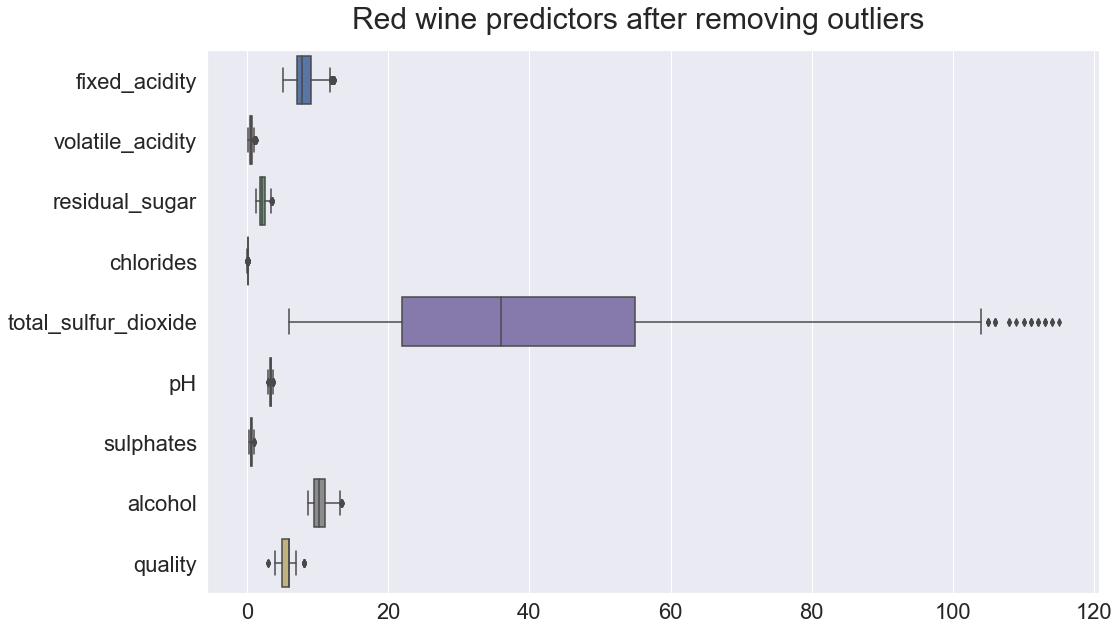

In [37]:
box_plot(data = df_red, title = "Red wine predictors after removing outliers")

From the box plot, we can see that we have successfully removed most of the outliers for all variables of red wine.

In [38]:
df_white.describe()

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,total_sulfur_dioxide,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,6.391415,0.045772,138.360657,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,5.072058,0.021848,42.498065,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.600000,0.009000,9.000000,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,1.700000,0.036000,108.000000,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,5.200000,0.043000,134.000000,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,9.900000,0.050000,167.000000,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,65.800000,0.346000,440.000000,3.820000,1.080000,14.200000,9.000000


In [39]:
detect_outliers(df_white["fixed_acidity"])

(4.8, 8.8)

In [40]:
df_white = df_white.drop(df_white[df_white["fixed_acidity"]<4.8].index)
df_white = df_white.drop(df_white[df_white["fixed_acidity"]>8.8].index)

In [41]:
detect_outliers(df_white["volatile_acidity"])

(0.04499999999999996, 0.48500000000000004)

In [42]:
df_white = df_white.drop(df_white[df_white["volatile_acidity"]>0.48500000000000004].index)

In [43]:
detect_outliers(df_white["residual_sugar"])

(-10.600000000000001, 22.200000000000003)

In [44]:
df_white = df_white.drop(df_white[df_white["residual_sugar"]>22.200000000000003].index)

In [45]:
detect_outliers(df_white["chlorides"])

(0.015000000000000006, 0.07100000000000001)

In [46]:
df_white = df_white.drop(df_white[df_white["chlorides"]>0.07100000000000001].index)

In [47]:
detect_outliers(df_white["total_sulfur_dioxide"])

(19.5, 255.5)

In [48]:
df_white = df_white.drop(df_white[df_white["total_sulfur_dioxide"]<19.5].index)
df_white = df_white.drop(df_white[df_white["total_sulfur_dioxide"]>255.5].index)

In [49]:
detect_outliers(df_white["pH"])

(2.8049999999999997, 3.5649999999999995)

In [50]:
df_white = df_white.drop(df_white[df_white["pH"]<2.8049999999999997].index)
df_white = df_white.drop(df_white[df_white["pH"]>3.5649999999999995].index)

In [51]:
detect_outliers(df_white["sulphates"])

(0.19999999999999987, 0.7600000000000001)

In [52]:
df_white = df_white.drop(df_white[df_white["sulphates"]>0.7600000000000001].index)

In [53]:
detect_outliers(df_white["alcohol"])

(6.6499999999999995, 14.25)

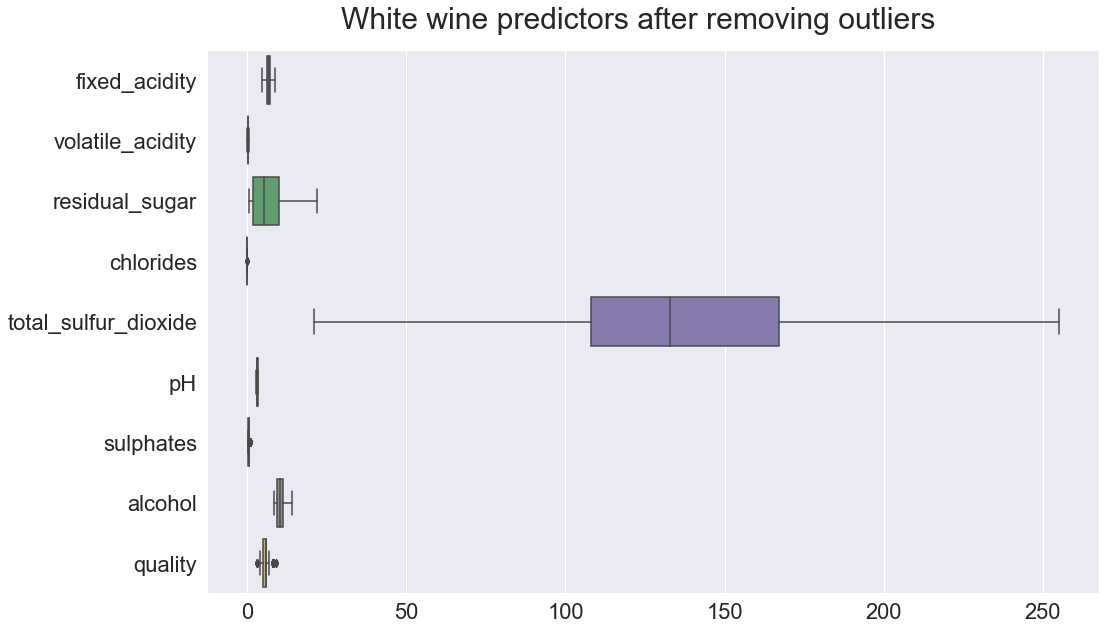

In [54]:
box_plot(data = df_white, title = "White wine predictors after removing outliers")

From the box plot, we can see that we have successfully removed most of the outliers for all variables of white wine.

In [55]:
df_r_corr=df_red.corr()
df_w_corr=df_white.corr()

In [56]:
df_r_corr

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,total_sulfur_dioxide,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256808,0.238057,0.189633,-0.082607,-0.679069,0.162705,-0.044594,0.112190
volatile_acidity,-0.256808,1.000000,0.037558,0.117332,0.073603,0.233872,-0.334784,-0.205895,-0.378484
residual_sugar,0.238057,0.037558,1.000000,0.240668,0.175732,-0.052110,0.050037,0.089003,0.013930
chlorides,0.189633,0.117332,0.240668,1.000000,0.153830,-0.153714,-0.081190,-0.322667,-0.208675
total_sulfur_dioxide,-0.082607,0.073603,0.175732,0.153830,1.000000,0.015848,-0.034369,-0.221881,-0.149846
pH,-0.679069,0.233872,-0.052110,-0.153714,0.015848,1.000000,0.018244,0.116229,-0.093309
sulphates,0.162705,-0.334784,0.050037,-0.081190,-0.034369,0.018244,1.000000,0.263313,0.428222
alcohol,-0.044594,-0.205895,0.089003,-0.322667,-0.221881,0.116229,0.263313,1.000000,0.493594
quality,0.112190,-0.378484,0.013930,-0.208675,-0.149846,-0.093309,0.428222,0.493594,1.000000


In [57]:
df_w_corr

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,total_sulfur_dioxide,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.044598,0.092723,0.099145,0.098906,-0.387775,0.000199,-0.103727,-0.066360
volatile_acidity,-0.044598,1.000000,0.065484,-0.027376,0.107147,-0.034577,-0.026584,0.097740,-0.128372
residual_sugar,0.092723,0.065484,1.000000,0.283117,0.420056,-0.214585,-0.035565,-0.499196,-0.117690
chlorides,0.099145,-0.027376,0.283117,1.000000,0.372205,-0.038549,0.077236,-0.547389,-0.282044
total_sulfur_dioxide,0.098906,0.107147,0.420056,0.372205,1.000000,-0.016535,0.138752,-0.473442,-0.176401
pH,-0.387775,-0.034577,-0.214585,-0.038549,-0.016535,1.000000,0.128279,0.112866,0.089511
sulphates,0.000199,-0.026584,-0.035565,0.077236,0.138752,0.128279,1.000000,-0.073810,0.019713
alcohol,-0.103727,0.097740,-0.499196,-0.547389,-0.473442,0.112866,-0.073810,1.000000,0.432843
quality,-0.066360,-0.128372,-0.117690,-0.282044,-0.176401,0.089511,0.019713,0.432843,1.000000


In [58]:
diff_corr = df_r_corr - df_w_corr

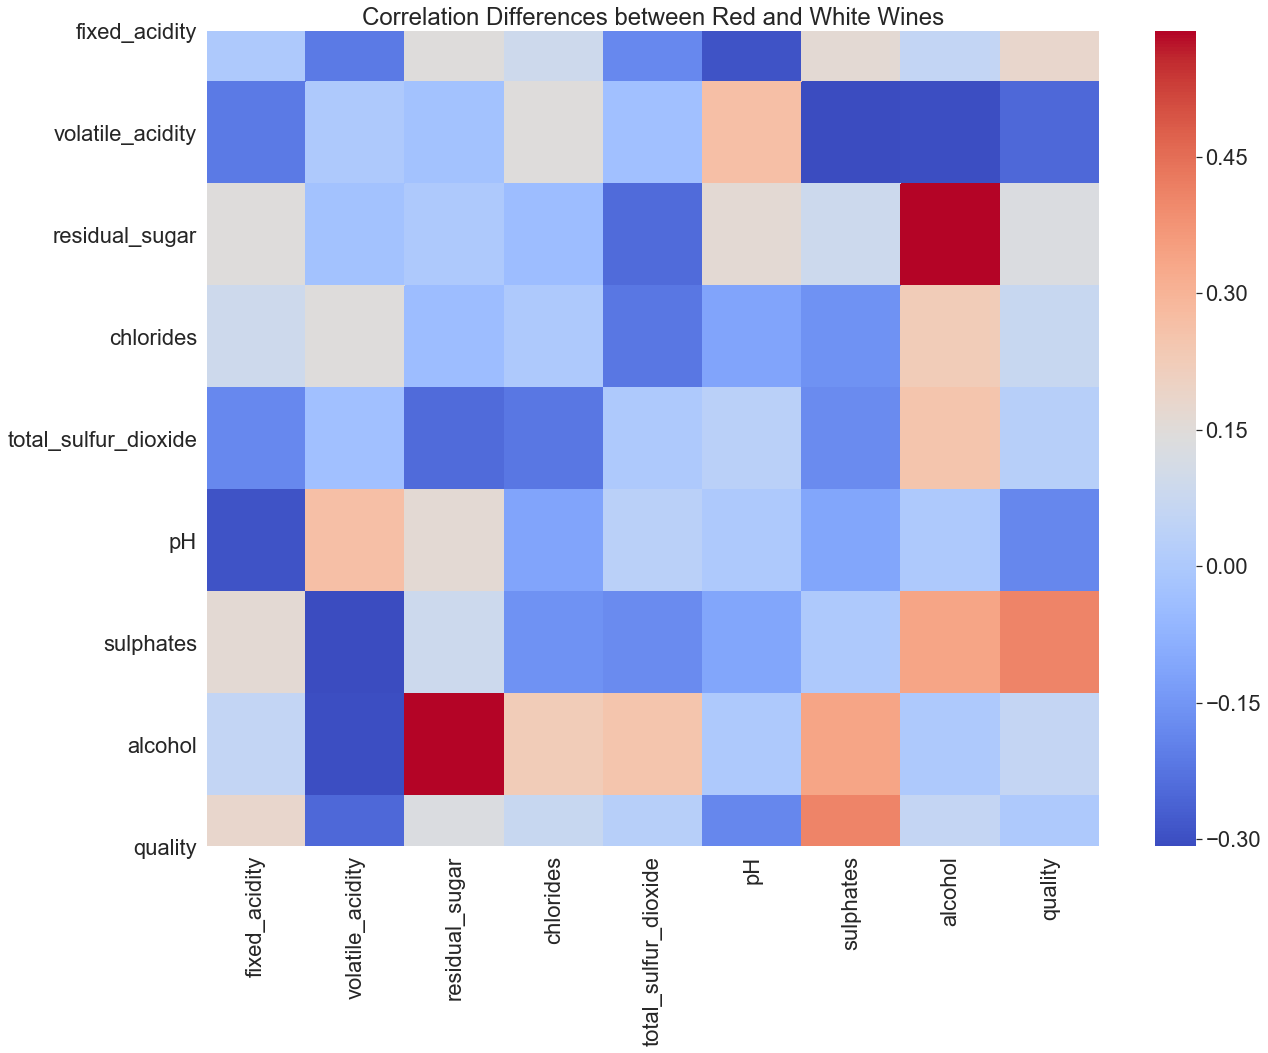

In [59]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Differences between Red and White Wines")
corr = diff_corr
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="coolwarm")

In [60]:
def boxcox_trans(data):
    for i in range(data.shape[1]):
        data.iloc[:, i], _ = st.boxcox(data.iloc[:, i])
    return data

In [61]:
df_red_trans = df_red.copy(deep = True)
df_red_trans.iloc[:, :-1] = boxcox_trans(df_red_trans.iloc[:, :-1])

In [62]:
df_white_trans = df_white.copy(deep = True)
df_white_trans.iloc[:, :-1] = boxcox_trans(df_white_trans.iloc[:, :-1])

In [63]:
df_all_trans=pd.concat([df_red_trans,df_white_trans],axis=0)
df_trans = pd.get_dummies(df_all_trans, columns=["color"])

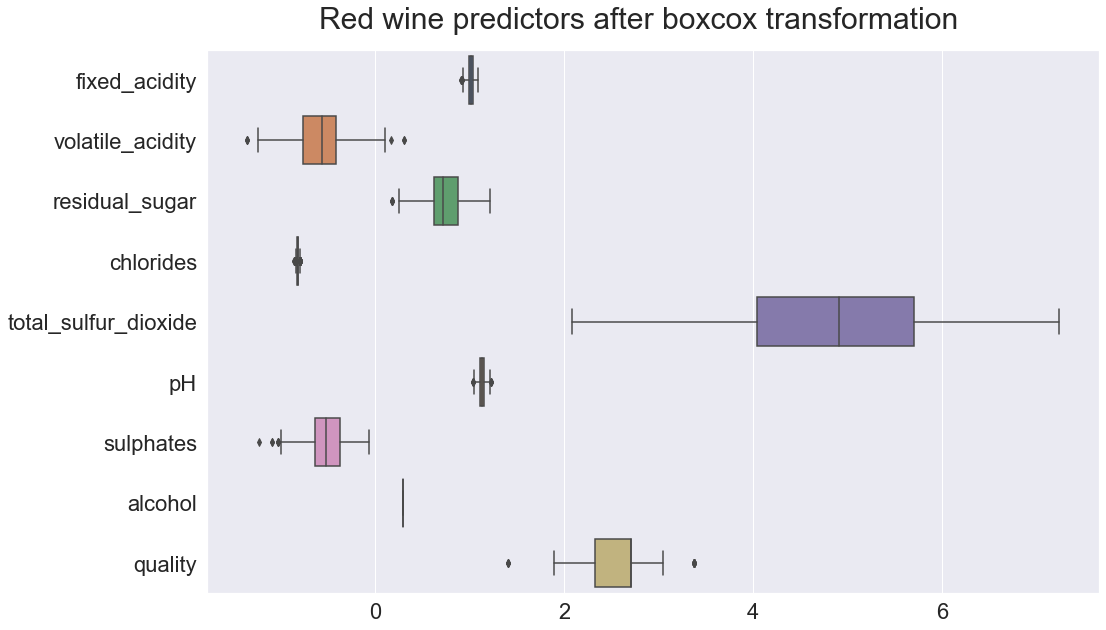

In [64]:
box_plot(data = df_red_trans, title = "Red wine predictors after boxcox transformation")

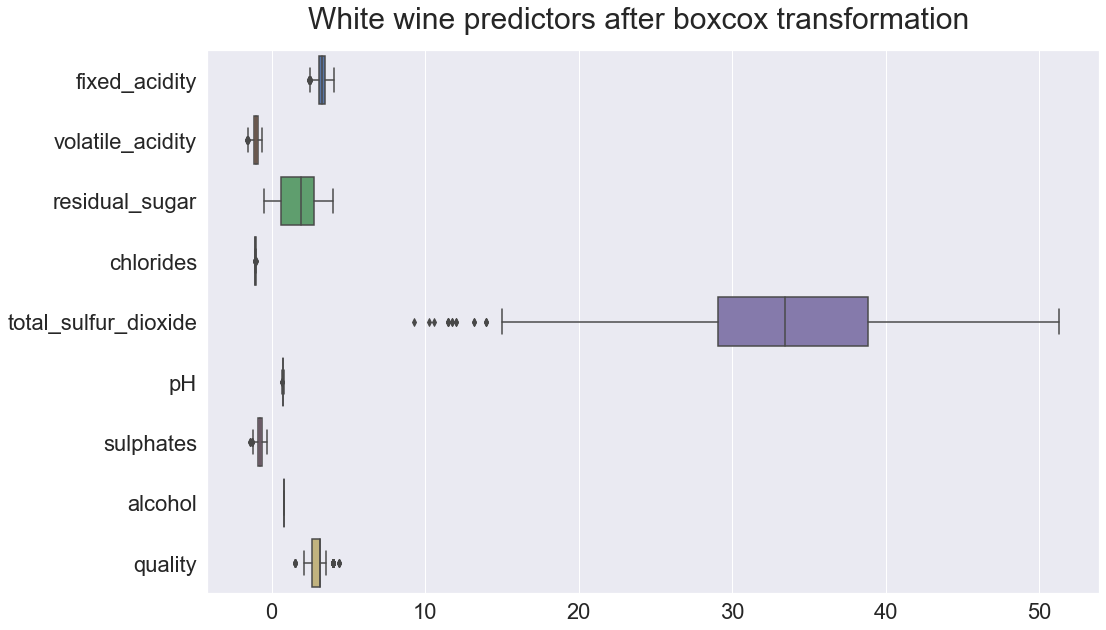

In [65]:
box_plot(data = df_white_trans, title = "White wine predictors after boxcox transformation")

## Machine Learning 
Now that we have did our analysis on the data and done with all the preprocessing, we will bulid our models that could predict quality of the red and white wine. 

We will use three approaches for buliding the models. One is using the traditional linear regression model, one is using the classifcation Machine Learning algorithm and another by using Neural Networks using Tensorflow. For the traditional model I am going to use Support vector Machines. Thus we have:

- Linear Rgression 
- Support Vector Machines
- Neural Networks with Tensorflow

## Linear Regression 

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. 

We first use the whole dataset regression to find the coefficient estimates of different factors. In this model, we generate a dummy variable to label the color of the wine. We then use the segmented dataset regression to run the regression again. For each model, we calculate the accuracy and evaluate its performance. 

In [66]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=4) 

## The Whole Dataset Regression

In [67]:
results1 = smf.ols('quality ~ total_sulfur_dioxide + residual_sugar + fixed_acidity + chlorides + volatile_acidity + alcohol + sulphates + pH + color_R', data=df_trans).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     436.1
Date:                Thu, 19 Mar 2020   Prob (F-statistic):               0.00
Time:                        00:36:26   Log-Likelihood:                -1720.2
No. Observations:                5435   AIC:                             3460.
Df Residuals:                    5425   BIC:                             3526.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -20.9728 

In [68]:
y = train["quality"]
cols = ["total_sulfur_dioxide","residual_sugar","fixed_acidity","chlorides","volatile_acidity","alcohol","sulphates","pH","color_R"]

X=train[cols]

In [69]:
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
ytrain_pred = regr.predict(X)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y, ytrain_pred))

In-sample Mean squared error: 0.55


In [71]:
ytest = test["quality"]
cols = ["total_sulfur_dioxide","residual_sugar","fixed_acidity","chlorides","volatile_acidity","alcohol","sulphates","pH","color_R"]

Xtest=test[cols]

In [72]:
ypred = regr.predict(Xtest)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytest, ypred))

Out-of-sample Mean squared error: 0.54


In [73]:
train2, test2 = train_test_split(df_trans, test_size=0.4, random_state=4)

In [74]:
y2 = train2["quality"]
cols = ["total_sulfur_dioxide","residual_sugar","fixed_acidity","chlorides","volatile_acidity","alcohol","sulphates","pH","color_R"]
X2=train2[cols]
regr.fit(X2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
ytrain_pred2 = regr.predict(X2)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y2, ytrain_pred2))

In-sample Mean squared error: 0.11


In [76]:
ytest2 = test2["quality"]
Xtest2=test2[cols]

In [77]:
ypred2 = regr.predict(Xtest2)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytest2, ypred2))

Out-of-sample Mean squared error: 0.11


## White Wine Regression

In [78]:
w_train, w_test = train_test_split(df_white_trans, test_size=0.2)

In [79]:
results_w = smf.ols('quality ~ total_sulfur_dioxide + residual_sugar + fixed_acidity + chlorides + volatile_acidity + alcohol + sulphates + pH', data=df_white_trans).fit()
print(results_w.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     166.1
Date:                Thu, 19 Mar 2020   Prob (F-statistic):          2.81e-244
Time:                        00:36:31   Log-Likelihood:                -1563.7
No. Observations:                4232   AIC:                             3145.
Df Residuals:                    4223   BIC:                             3202.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -21.4170 

In [80]:
y_w = w_train["quality"]
cols_w = ["total_sulfur_dioxide","residual_sugar","fixed_acidity","chlorides","volatile_acidity","alcohol","sulphates","pH"]
X_w=w_train[cols_w]
regr.fit(X_w,y_w)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
ytrain_predw = regr.predict(X_w)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y_w, ytrain_predw))

In-sample Mean squared error: 0.12


In [82]:
ytestw = w_test["quality"]
Xtestw = w_test[cols_w]
ypredw = regr.predict(Xtestw)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytestw, ypredw))

Out-of-sample Mean squared error: 0.13


## Red Wine Regression 

In [83]:
r_train, r_test = train_test_split(df_red_trans, test_size=0.2)

In [84]:
results_r = smf.ols('quality ~ total_sulfur_dioxide + residual_sugar + fixed_acidity + chlorides + volatile_acidity + alcohol + sulphates + pH', data=df_red_trans).fit()
print(results_r.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     90.27
Date:                Thu, 19 Mar 2020   Prob (F-statistic):          4.43e-117
Time:                        00:36:32   Log-Likelihood:                 60.295
No. Observations:                1203   AIC:                            -102.6
Df Residuals:                    1194   BIC:                            -56.76
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -919.8278 

In [85]:
y_r = r_train["quality"]
cols_r = ["total_sulfur_dioxide","residual_sugar","fixed_acidity","chlorides","volatile_acidity","alcohol","sulphates","pH"]
X_r=r_train[cols_r]
regr.fit(X_r,y_r)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
ytrain_predr = regr.predict(X_r)
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y_r, ytrain_predr))

In-sample Mean squared error: 0.05


In [87]:
ytestr = r_test["quality"]
Xtestr = r_test[cols_r]
ypredr = regr.predict(Xtestr)
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytestr, ypredr))

Out-of-sample Mean squared error: 0.05


In [88]:
y_both = pd.concat([y_w,y_r])

In [89]:
ytrain_predW=pd.DataFrame(ytrain_predw)
ytrain_predR=pd.DataFrame(ytrain_predr)

y_train_predboth = pd.concat([ytrain_predW,ytrain_predR])

In [90]:
print("In-sample Mean squared error: %.2f"
      % mean_squared_error(y_both, y_train_predboth))

In-sample Mean squared error: 0.11


In [91]:
ytestboth = pd.concat([ytestw,ytestr])
Xtestboth = pd.concat([Xtestw,Xtestr])
                                          
ypredboth = pd.concat([pd.DataFrame(ypredw),pd.DataFrame(ypredr)])
print("Out-of-sample Mean squared error: %.2f"
      % mean_squared_error(ytestboth, ypredboth))

Out-of-sample Mean squared error: 0.11


## Support Vector Machines (SVM)
In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

Before creating the model we need to split the data into testing and training set. This will help us to make our more generalized to the data which we have not seen before. We will have 75% of the data in the train set and the rest in the test set. I have set the randomw seed to be 1 for reproduciablity.

In [92]:
# Split the the whole data into test and train
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(df_red.iloc[:, :-2], df_red.iloc[:, -2],
                                                    test_size=0.25, random_state=1)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(df_white.iloc[:, :-2], df_white.iloc[:, -2],
                                                    test_size=0.25, random_state=1)

In [93]:
# Custom functions to use the SVM model
def svm_accuracy_cv(X_train, X_test, y_train, y_test, n_fold = 10):
    # Intialize the variables
    best_score = 0
    best_C = 10000
    C_list = [1, 10, 100, 1000]
    for C in C_list:
        # Creating the SVM model 
        svc = svm.SVC(C = C, kernel = 'rbf')
        # Getting the scores on n folds
        scores = cross_val_score(svc, X_train, y_train, cv = n_fold)
        score = scores.mean()
        # Check and assign the best score paramters
        if score > best_score:
            best_C = C
            best_score = score
    # Fir the complete model over all the training data
    svc = svm.SVC(C = best_C, kernel = "rbf")
    svc.fit(X_train, y_train)
    # Get the accuracy over the teating data
    accuracy = svc.score(X_test, y_test)
    return accuracy, best_C

In [94]:
# Compute the accuracy
red_wine_accuracy, C_red = svm_accuracy_cv(X_train_red, X_test_red, y_train_red, y_test_red, n_fold = 10)
white_wine_accuracy, C_white = svm_accuracy_cv(X_train_white, X_test_white, y_train_white, y_test_white, n_fold = 10)

# Print the accuracy
print("The accuracy of the SVM model on Red wine dataset with 10 fold cross validation is", 
      round(red_wine_accuracy * 100, 2), "percentage with the best cost value of", C_red)
print("The accuracy of the SVM model on White wine dataset with 10 fold cross validation is", 
      round(white_wine_accuracy * 100, 2), "percentage with the best cost value of", C_white)

The accuracy of the SVM model on Red wine dataset with 10 fold cross validation is 59.47 percentage with the best cost value of 100
The accuracy of the SVM model on White wine dataset with 10 fold cross validation is 59.36 percentage with the best cost value of 100


In [95]:
h = {'Dataset': ['Red Wine','White Wine'], 'Accuracy(%)': [59.47,59.36]}
df_accuracy = pd.DataFrame(data=h)
df_accuracy

,Dataset,Accuracy(%)
0,Red Wine,59.47
1,White Wine,59.36


Thus the accuracy of the SVM model on red wine dataset training with 10 fold cross validation is 59.47%.
The accuracy of the SVM model on white wine dataset training with 10 fold cross validation is 59.36%.

Now we have the model for predicting the quality scale of the red and white wine seperately. We can also bulid a model that can make predicition on whether it is a red or white wine. For this we need to merge both the dataset into one single dataset by haveing new column that represent '0' for Red and '1' white wine. Then we will follow the same procedure as previously to use the custom SVM model we bulid before.

In [96]:
df_red_trans = df_red_trans.drop(columns=['color'])

In [97]:
df_white_trans = df_white_trans.drop(columns=['color'])

In [98]:
# Adding the new column wine type 
df_red_trans["wine type"] = 0
df_white_trans["wine type"] = 1

# Concatenate both the dataset
wine_df = pd.concat([df_red_trans, df_white_trans], axis = 0, ignore_index = False)

# Split the the whole data into test and train
X_train, X_test, y_train, y_test = train_test_split(wine_df.iloc[:, :-1], wine_df.iloc[:, -1],
                                                    test_size=0.25, random_state=1)

# Compute the accuracy
accuracy, C = svm_accuracy_cv(X_train, X_test, y_train, y_test, n_fold = 10)

# Print the accuracy
print("The accuracy of the SVM model on wine dataset with 10 fold cross validation is", 
      round(accuracy * 100, 2), "percentage with the best cost value of", C_red)

The accuracy of the SVM model on wine dataset with 10 fold cross validation is 100.0 percentage with the best cost value of 100


This result is amazing, we have 100% accurate model that we can implement in the production environment to classify any new data points as whether it is a red or white wine.

## Neural Networks with Tensorflow

Created by the Google Brain team, TensorFlow is an open source library for numerical computation and large-scale machine learning. TensorFlow bundles together a slew of machine learning and deep learning (aka neural networking) models and algorithms and makes them useful by way of a common metaphor.

In [97]:
class NeuralNet:
    
    # initalize the class variables
    def __init__(self, learning_rate = 0.001, batch_size = 100, epochs = 1000):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
    
    # One hot encoding of the labels
    def dense_to_one_hot(self, labels_dense, num_classes = 2):
        # Intialize the output variable
        labels_one_hot = []
        # Frame the label array
        for label in labels_dense:
            indices = [1]*num_classes
            indices[label] = 0
            labels_one_hot.append(indices)
        return labels_one_hot

    # Create batches of the training set
    def make_batch(self, X, y, batch_size):
        # Compute the length of the data
        y_size = len(y)
        # Create random batches
        index_sample = np.random.choice(X.shape[0], batch_size, replace=False)
        y_array = np.array(y)
        # Subset by the index
        X_batch = X[index_sample, :]
        y_batch = y_array[index_sample]
        return X_batch, y_batch
    
    # Computes the soft max layer
    def softmax_layer(self, X_tensor, num_units):
        # Get the size of the input from the tensor
        num_inputs = X_tensor.get_shape()[1].value
        # Create weight, bias and label variables
        W = tf.Variable(tf.zeros([num_inputs, num_units]), name='W')
        b = tf.Variable(tf.zeros([num_units]), name='b')
        # Compute out y on the this layer
        y = tf.nn.softmax(tf.matmul(X_tensor, W) + b)
        return y
    
    # Computes the Rectified Linear Units
    def relu_layer(self, X_tensor, num_units):
        # Get the size of the input from the tensor
        num_inputs = X_tensor.get_shape()[1].value
        # Create weight, bias and label variables
        W = tf.Variable(tf.random_uniform([num_features, num_units]), name='W')
        b = tf.Variable(tf.zeros([num_units]), name='b')
        # Compute the rectified linear unit activation on this point
        y = tf.nn.relu(tf.matmul(X_tensor, W) + b, name='relu')
        return y
    
    # Compute teh cost function
    def define_cost_function(self, y, y_tensor, batch_size):
        # Define the cross entropy cost
        cost = -tf.reduce_sum(y_tensor * tf.log(y), name='cross_entropy') / batch_size
        return cost
    
    # Train the model
    def train(self, cost, learning_rate):
        # Use Gradient descent to compute the optimum
        training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
        return training_step
    
    # Formulates the accuracy
    def compute_accuracy(self, y, y_tensor):
        # Check the predictions
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_tensor, 1))
        # Compute the accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"), name='accuracy')
        return accuracy
    
    # bulid the two layer Net
    def two_layers(self):
        # Create hidden, relu layer
        with tf.name_scope("hidden_layer") as scope:
            y_relu = self.relu_layer(X_placeholder, hidden_layer_units)

        # Create softmax layer
        with tf.name_scope("softmax") as scope:
            y_softmax = self.softmax_layer(y_relu, num_classes)

        # Define cost function
        with tf.name_scope("cost_function") as scope:
            global cost
            cost = self.define_cost_function(y_softmax, y_placeholder, batch_size)
            tf.summary.scalar("cost", cost)

        # Define training step
        with tf.name_scope("training") as scope:
            global training_step
            training_step = self.train(cost, learning_rate)

        # Calculate model accuracy
        with tf.name_scope("accuracy") as scope:
            global accuracy
            accuracy = self.compute_accuracy(y_softmax, y_placeholder)
            tf.summary.scalar("accuracy", accuracy)

In [98]:
# Hyperparamters
learning_rate = 0.001
batch_size = X_train.shape[0] // 10
num_features = X_train.shape[1]
num_classes = 2
epochs = 1000
epoch_list = []
epochs_to_print = epochs // 10
hidden_layer_units = 30
avg_cost_list = []

# Define the placeholder
X_placeholder = tf.placeholder(tf.float32, [None, num_features], name='X')
y_placeholder = tf.placeholder(tf.float32, [None, num_classes], name='y')

# Create the NeuralNet Class object
NN = NeuralNet()

# Do one hot encoding for the labels
y_train_one_hot = NN.dense_to_one_hot(y_train, num_classes = num_classes)
y_test_one_hot = NN.dense_to_one_hot(y_test, num_classes = num_classes)

# Call the layers 
NN.two_layers()

# Merge summaries for TensorBoard
merged_summaries = tf.summary.merge_all()

# Start the tensorflow session
with tf.Session() as sess:
    # Create the log directory
    log_directory = 'tmp/logs'
    summary_writer = tf.summary.FileWriter(log_directory, sess.graph)
    
    # Intialize the global variables
    tf.global_variables_initializer().run()
    
    cost_sum = 0
    for i in range(epochs):
        # Make the batches
        X_batch, y_batch = NN.make_batch(np.array(X_train), np.array(y_train_one_hot), batch_size)
        # Feeder
        feed_dict = {X_placeholder: X_batch, y_placeholder: y_batch}
        # Compute the cost
        _, current_cost = sess.run([training_step, cost], feed_dict)
        # Sum the overall cost
        cost_sum += current_cost
        
        # Print average cost periodically
        if i % epochs_to_print == 99:
            average_cost = cost_sum / epochs_to_print
            avg_cost_list.append(round(average_cost, 4))
            epoch_list.append(i+1)
            print("Epoch: {:4d}, average cost = {:0.3f}".format(i+1, average_cost))
            cost_sum = 0
    
    print('\nFinished model fitting.')
 
    # Calculate final accuracy
    X_batch, y_batch = NN.make_batch(np.array(X_test), np.array(y_test_one_hot), batch_size)
    feed_dict = {X_placeholder: X_test, y_placeholder: y_test_one_hot}
    print("\nFinal accuracy = {:0.3f}%".format(sess.run(accuracy * 100, feed_dict)))

Epoch:  100, average cost = 0.252
Epoch:  200, average cost = 0.179
Epoch:  300, average cost = 0.145
Epoch:  400, average cost = 0.117
Epoch:  500, average cost = 0.099
Epoch:  600, average cost = 0.085
Epoch:  700, average cost = 0.076
Epoch:  800, average cost = 0.067
Epoch:  900, average cost = 0.061
Epoch: 1000, average cost = 0.056

Finished model fitting.

Final accuracy = 99.779%


Thus the Neural network with tensorflow has got the accuracy of the 99.779%.